In [151]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import contextily as ctx

In [177]:
def print_polygons(geo_df, geometry_column='geometry', figsize=(25, 25), edgecolor='black', linewidth=1):
    """
    Print the polygons of a GeoPandas DataFrame.

    Args:
        geo_df (geopandas.GeoDataFrame): The GeoPandas DataFrame containing polygons.
        geometry_column (str, optional): The name of the column containing the geometry. Defaults to 'geometry'.
        figsize (tuple, optional): The size of the figure (width, height) in inches. Defaults to (10, 10).
        edgecolor (str, optional): The color of the polygon border lines. Defaults to 'black'.
        linewidth (float, optional): The width of the polygon border lines. Defaults to 1.
    """
    # Plot the polygons with only border lines
    plt.figure(figsize=figsize)  # Set the figure size
    geo_df[geometry_column].plot(ax=plt.gca(), facecolor='none', edgecolor=edgecolor, linewidth=linewidth)
    plt.show()
    
    
def plot_points_by_category(geo_df, category_column, figsize=(25, 25)):
    """
    Plot points with different colors based on a categorical column.

    Args:
        geo_df (geopandas.GeoDataFrame): The GeoPandas DataFrame containing points.
        category_column (str): The name of the categorical column used for coloring.
        figsize (tuple, optional): The size of the figure (width, height). Defaults to (10, 10).
    """
    # Create a new figure with the specified size
    fig, ax = plt.subplots(figsize=figsize)
    
    # Get unique categories from the specified column
    categories = geo_df[category_column].unique()

    geo_df.plot(ax=ax, column=category_column, markersize=75, alpha=0.7, edgecolor='k') 

    # Add legend
    plt.legend(title=category_column, title_fontsize='large', fontsize='large', loc='upper left')
    
    # Show the plot
    plt.show()    

    
def load_shape_data(shapefile, target_crs = "EPSG:4326"):
        df = gpd.read_file(shapefile)
        return df.to_crs(target_crs)

In [68]:
district_path = "/Users/miguelgranica/Documents/MBIT - DE/TFM/synthetic_data/static_data/Distritos.shp"
geo_location_path = "/Users/miguelgranica/Documents/MBIT - DE/TFM/synthetic_data/results/clients_geo.csv"

In [92]:
df_district = load_shape_data(district_path)
df_clients = pd.read_csv(geo_location_path)

In [93]:
df_geo_located = gpd.GeoDataFrame(
    df_clients, geometry=gpd.points_from_xy(df_clients.lon, df_clients.lat), crs="EPSG:4326"
)

In [188]:
def plot_points_by_category(geo_df, polygons_gdf, category_column, figsize=(25, 25)):
    """
    Plot points with different colors based on a categorical column.

    Args:
        geo_df (geopandas.GeoDataFrame): The GeoPandas DataFrame containing points.
        category_column (str): The name of the categorical column used for coloring.
        figsize (tuple, optional): The size of the figure (width, height). Defaults to (10, 10).
    """
    # Create a new figure with the specified size
    fig, ax = plt.subplots(figsize=figsize)
    
    # Get unique categories from the specified column
    categories = geo_df[category_column].unique()
    
    polygons_gdf.plot(ax=ax, alpha=0.25, edgecolor='black')
    geo_df.plot(ax=ax, column=category_column, markersize=75, alpha=0.7, edgecolor='k', legend=True) 

    # Add legend
    #plt.legend(title=category_column, title_fontsize='large', fontsize='large', loc='upper left')
    # Add basemap
    ctx.add_basemap(ax, crs=polygons_gdf.crs.to_string(), source=ctx.providers.CartoDB.PositronNoLabels, zoom=10)
    ax.set_axis_off()
    
    # Show the plot
    plt.show()

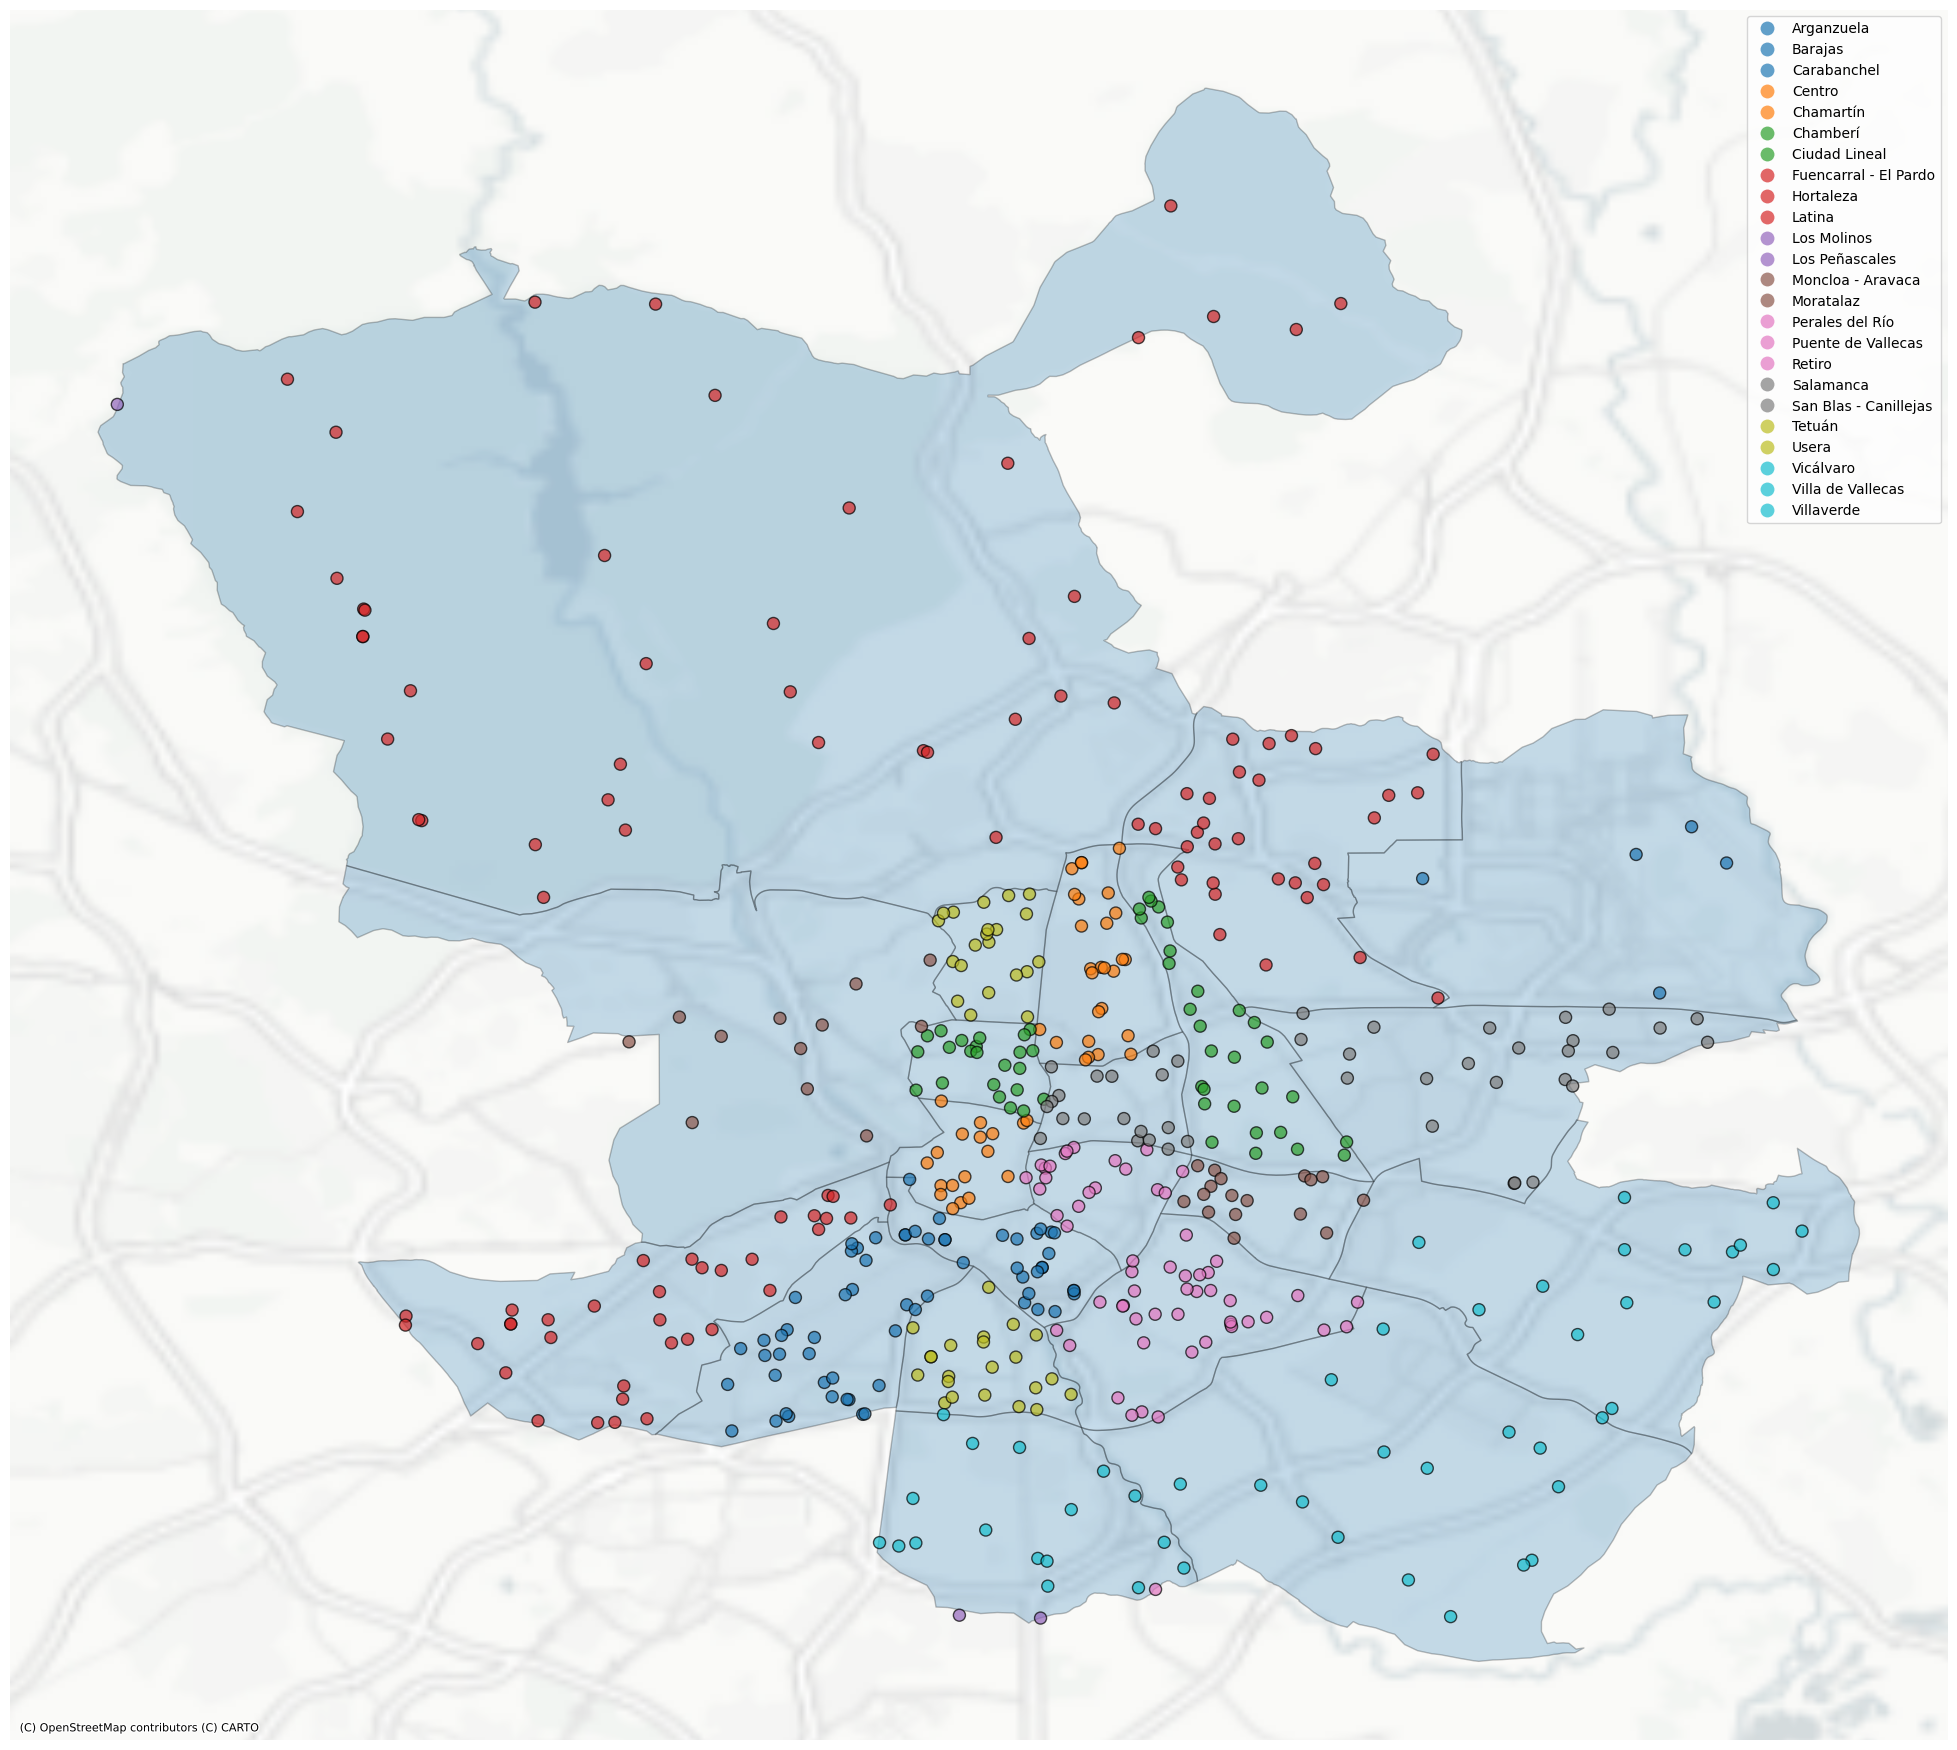

In [189]:
plot_points_by_category(df_geo_located, df_district, "district_name")